## Prueba #0307

### "ANOVA para el crecimiento de los dientes en las cobayas"

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Responda las siguientes preguntas proporcionando código Python:

Utilizar el conjunto de datos "data_ToothGrowth.csv". Los atributos de este dataset son los siguientes:
- len = longitud de los dientes.
- sup = tipo suplementario con dos valores posibles: VC (vitamina C) o OJ (zumo de naranja).
- dosis (mgr / día) = dosis por día con tres valores posibles: 0,5, 1,0, 2,0.

In [2]:
# Ir al directorio que contiene al fichero. 
os.chdir(r'./')                # Descomentar y reemplazar
                                 # por la ruta adecuada si el fichero no esta en el mismo directorio.

In [3]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [4]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


1) Realice el test ANOVA ($\alpha = 5\%$) con la variable 'supp' para determinar si las varianzas de las longitudes de los dientes entre las categorías son comparables. <br>
Comente el resultado y complete la explicación con un diagrama de cajas.

In [27]:
# Agrupar por categoría 1.
df.supp.unique()

array(['VC', 'OJ'], dtype=object)

In [28]:
# Agrupar por categoría 2.
pd.value_counts(df['supp'])

VC    30
OJ    30
Name: supp, dtype: int64

In [34]:
# ANOVA.
vc = df[df.supp == 'VC'].len #Obtenemos la longitud de cada campo que tenga VC
oj = df[df.supp == 'OJ'].len #Obtenemos la longitud de cada campo que tenga OJ
anova = st.f_oneway(vc,oj)

print (anova)

F_onewayResult(statistic=3.6682525410709697, pvalue=0.060393371224128745)


In [ ]:
# Comentario del resultado.
# No existen diferencias en funcion de la longitud del diente

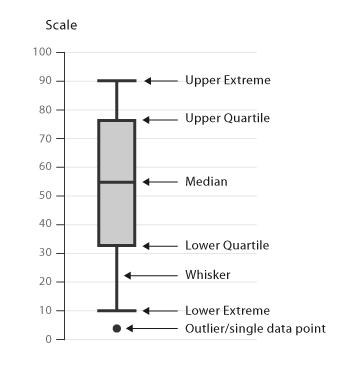

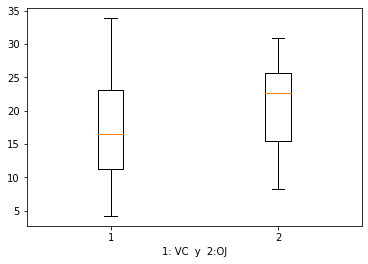

In [24]:
# Diagrama de cajas.
plt.boxplot([df[df.supp == 'VC'].len,df[df.supp == 'OJ'].len],  positions=[1,2])
plt.xlabel("1: VC  y  2:OJ")
plt.show()

2) Realice el test ANOVA ($\alpha = 5\%$) con la variable 'dose' para determinar si las varianzas de las categorías son comparables. <br>
Comente el resultado y complete la explicación con un diagrama de cajas.

In [36]:
# Agrupar por categoría 1.
df.dose.unique()

array([0.5, 1. , 2. ])

In [37]:
# Agrupar por categoría 2.
pd.value_counts(df['dose'])

2.0    20
0.5    20
1.0    20
Name: dose, dtype: int64

In [39]:
# ANOVA.
a = df[df.dose == 0.5].len
b = df[df.dose == 2.0].len
c = df[df.dose == 1.0].len
anova = st.f_oneway(a,b,c)

print (anova)

F_onewayResult(statistic=67.41573785674251, pvalue=9.532727011699846e-16)


In [ ]:
# Comentario del resultado.
# Existen diferencias en funcion de la dosis por día

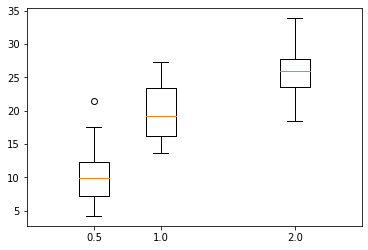

In [26]:
# Diagrama de cajas.
plt.boxplot([df[df.dose == 0.5].len,df[df.dose == 1.0].len,df[df.dose == 2.0].len],  positions=[0.5,1,2])
plt.show()